### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [34]:
nuevo_df = df.drop(["benefitsReview","sideEffectsReview","commentsReview"],axis=1)

In [35]:
nuevo_df

,urlDrugName,rating,effectiveness,sideEffects,condition
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia
...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [36]:
df_dummies = pd.get_dummies(nuevo_df, columns=["urlDrugName", "effectiveness", "sideEffects", "condition"])

In [37]:
df_dummies

,rating,urlDrugName_abilify,urlDrugName_accolate,urlDrugName_accupril,urlDrugName_accutane,urlDrugName_aciphex,urlDrugName_actiq,urlDrugName_actonel,urlDrugName_actos,urlDrugName_acyclovir,...,condition_white spots on facial skin,condition_whiteheads,condition_wilson diseaes,condition_wrinkles,condition_wrinkles around eyes,"condition_wrinkles, furrows",condition_year round allergies,condition_yeast,condition_yeast diaper rash,condition_yeast infection
2202,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3117,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1146,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3947,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1951,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3281,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1664,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2621,8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies)

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

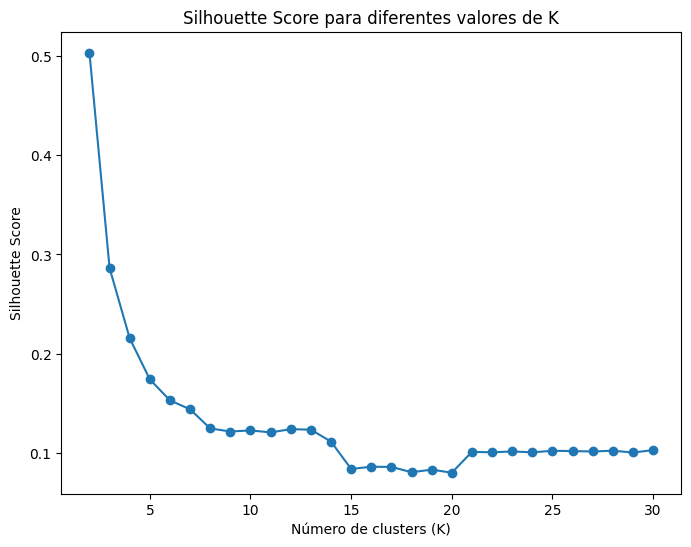

El mejor valor de K es 2 con un Silhouette Score de 0.5035


In [41]:
k_range = range(2, 31) 

sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_dummies) 

    score = silhouette_score(df_dummies, kmeans.labels_)
    sil_scores.append(score)

# Grafico
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Mejor K
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"El mejor valor de K es {best_k} con un Silhouette Score de {max(sil_scores):.4f}")

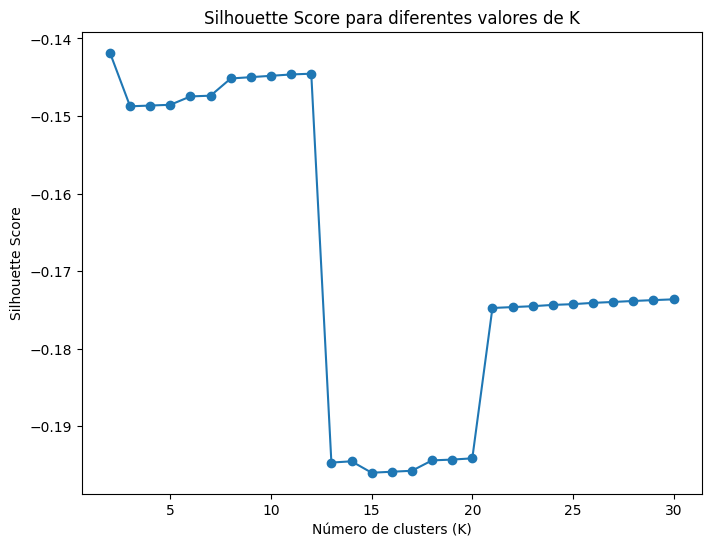

El mejor valor de K es 2 con un Silhouette Score de -0.1418


In [42]:
k_range = range(2, 31)

sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)

# Grafico
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Mejor K
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"El mejor valor de K es {best_k} con un Silhouette Score de {max(sil_scores):.4f}")

#### Genera el K Means 